In [9]:
import pandas as pd
import torch
from LSTMPredict import LSTMPredict
from modules import LSTM_Model
import pickle
device = "cuda" if torch.cuda.is_available() else "cpu"
import matplotlib.pyplot as plt
import os

In [3]:
symbol = "FPT"

In [4]:
csv_file_path = f'D:\KLTN\RLServer\LSTMCSV\{symbol}.csv'

# Read the CSV file using pandas
data = pd.read_csv(csv_file_path)

In [5]:
model = LSTM_Model(input_size = 20,output_size = 1)
model.to(device)
model.load_state_dict(torch.load(f"checkpoint/{symbol}_forecast_model.pt"))
x_scaler = pickle.load(open(f"checkpoint/{symbol}_LSTM_xscaler.pkl", 'rb'))
y_scaler = pickle.load(open(f"checkpoint/{symbol}_LSTM_yscaler.pkl", 'rb'))
result = LSTMPredict(data,x_scaler,y_scaler,model)

d:\KLTN\RLServer\LSTMPredict.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  update_row['Date']= update_row['Date'] + timedelta(days=1)
d:\KLTN\RLServer\LSTMPredict.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_feedback['Open'][update_index] = update_row['Open']
d:\KLTN\RLServer\LSTMPredict.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_feedback['High'][update_index] = update_row['High']
d:\KLTN\RLServer\LSTMPre

2575 Date        2024-05-17 00:00:00
Close                  134500.0
Open                   135400.0
High                   136000.0
Low                    133700.0
forecast                    NaN
signal                      NaN
Name: 2575, dtype: object
2576 {'Date': Timestamp('2024-05-18 00:00:00'), 'forecast': 75288.02}
2577 {'Date': Timestamp('2024-05-19 00:00:00'), 'forecast': 70089.945}
2578 {'Date': Timestamp('2024-05-20 00:00:00'), 'forecast': 72434.06}
2579 {'Date': Timestamp('2024-05-21 00:00:00'), 'forecast': 68139.44}
2580 {'Date': Timestamp('2024-05-22 00:00:00'), 'forecast': 67832.95}
2581 {'Date': Timestamp('2024-05-23 00:00:00'), 'forecast': 64638.58}
2582 {'Date': Timestamp('2024-05-24 00:00:00'), 'forecast': 62619.883}
2583 {'Date': Timestamp('2024-05-25 00:00:00'), 'forecast': 61078.117}
2584 {'Date': Timestamp('2024-05-26 00:00:00'), 'forecast': 58327.637}
2585 {'Date': Timestamp('2024-05-27 00:00:00'), 'forecast': 56097.426}
2586 {'Date': Timestamp('2024-05-28 00:0

In [6]:
result['Close'] = result['Close'].fillna(result['forecast'])

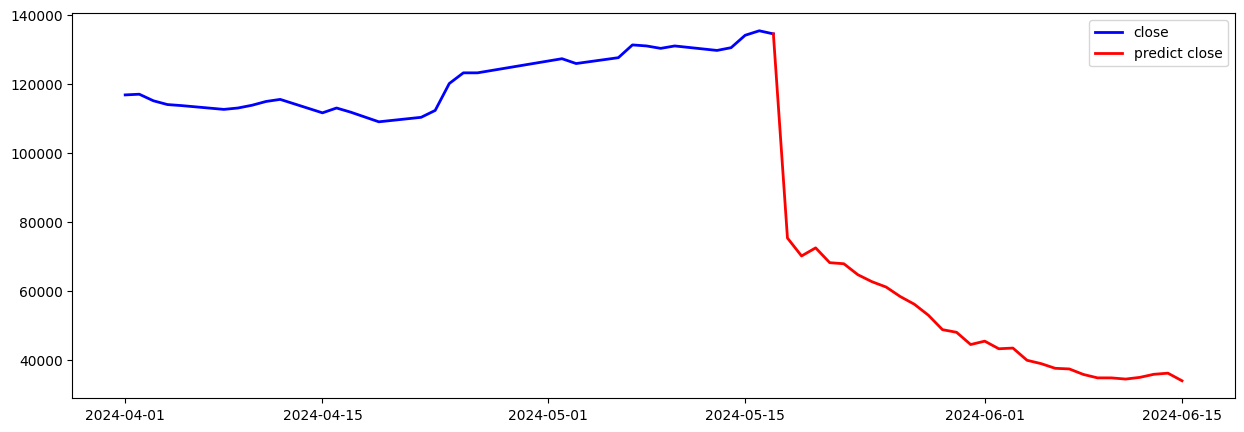

In [7]:
fig = plt.figure(figsize = (15, 5))
# Vẽ 60 ngày cuối cùng
plt.plot(result['Date'].iloc[-60:-29], result['Close'].iloc[-60:-29], color='blue', lw=2, label='close')

# Vẽ 30 ngày cuối cùng với màu khác
plt.plot(result['Date'].iloc[-30:], result['Close'].iloc[-30:], color='red', lw=2, label='predict close')
plt.legend()
plt.show()

In [10]:
result = result.drop(columns=['forecast', 'signal'], errors='ignore')
output_directory = "LSTMCSV"
output_file_path = os.path.join(output_directory, f'{symbol}predictions.csv')
result.to_csv(output_file_path, index=False)